In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('2.01. Admittance.csv')

In [4]:
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [5]:
data = raw_data.copy()

In [6]:
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [7]:
y = data['Admitted']
x1 = data['SAT']
x = sm.add_constant(x1)

In [8]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [9]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Jun 2020   Pseudo R-squ.:                  0.7992
Time:                        21:25:26   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [10]:
def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

In [11]:
f_sorted = np.sort(f(x1,results_log.params[0], results_log.params[1]))

In [12]:
x_sorted = np.sort(x1)

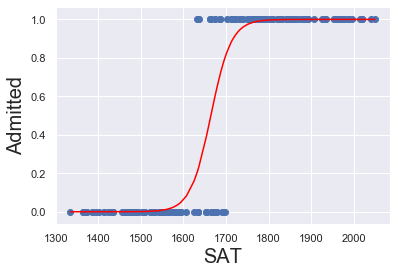

<Figure size 1440x1440 with 0 Axes>

In [13]:
ax = plt.scatter(x1,y,color ='C0')
plt.xlabel("SAT", fontsize = 20)
plt.ylabel("Admitted", fontsize = 20)
ax2 = plt.plot(x_sorted, f_sorted, color ='red')
plt.figure(figsize = (20,20))
plt.show()

In [14]:
np.exp(1.9449)

6.992932526814459

In [15]:
np.set_printoptions(formatter={'float': lambda x:"{0:0.2f}".format(x)})

In [16]:
results_log.predict()

array([0.00, 1.00, 1.00, 0.38, 0.05, 0.98, 0.99, 1.00, 1.00, 0.03, 1.00,
       1.00, 0.50, 0.00, 0.77, 1.00, 0.21, 0.22, 0.23, 1.00, 1.00, 1.00,
       0.00, 0.00, 0.91, 1.00, 0.22, 1.00, 1.00, 0.98, 0.00, 0.61, 0.41,
       1.00, 1.00, 1.00, 0.50, 1.00, 0.39, 0.00, 0.04, 0.20, 1.00, 0.00,
       1.00, 0.00, 0.98, 0.00, 0.00, 0.01, 0.01, 1.00, 0.80, 0.01, 1.00,
       0.00, 0.56, 0.95, 0.22, 0.99, 0.01, 0.89, 1.00, 1.00, 0.99, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.89, 0.22, 0.00, 1.00, 1.00, 1.00, 0.00,
       0.49, 1.00, 1.00, 0.01, 1.00, 1.00, 0.65, 1.00, 1.00, 0.00, 1.00,
       0.99, 0.72, 0.60, 0.00, 0.95, 0.91, 0.00, 1.00, 1.00, 0.01, 0.98,
       0.88, 0.99, 0.00, 0.99, 0.03, 0.00, 0.99, 0.99, 1.00, 0.00, 0.00,
       0.04, 0.52, 0.00, 1.00, 0.16, 0.00, 0.92, 0.00, 0.47, 1.00, 1.00,
       0.02, 0.00, 0.00, 1.00, 0.01, 0.96, 0.75, 0.72, 0.94, 0.60, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.08, 0.00, 0.01, 1.00, 0.98, 0.70,
       0.99, 1.00, 0.02, 0.00, 0.00, 0.00, 0.83, 1.

In [17]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [18]:
results_log.pred_table()

array([[67.00, 7.00],
       [7.00, 87.00]])

In [19]:
cm_df = pd.DataFrame(results_log.pred_table())

In [20]:
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df

,Predicted 0,Predicted 1
0,67.0,7.0
1,7.0,87.0


In [21]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9166666666666666

In [22]:
raw_data = pd.read_csv('2.02. Binary predictors.csv')
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


In [23]:
y = data['Admitted']
x1 = data[['SAT','Gender']]
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Jun 2020   Pseudo R-squ.:                  0.8249
Time:                        21:47:04   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [25]:
test = pd.read_csv('2.03. Test dataset.csv')
test['Admitted'] = test['Admitted'].map({'Yes': 1, 'No': 0})
test['Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})
test.head()

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0


In [26]:
x.head()

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0


In [34]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'], axis = 1)
test_data = sm.add_constant(test_data)
test_data.head()

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0


In [36]:
def confusion_matrix (data, actual_values,model):
    predict_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, predict_values, bins =bins)[0]
    accuracy = (cm[0,0] + cm[1,1]) /cm.sum()
    return cm, accuracy

In [37]:
cm = confusion_matrix(test_data,test_actual,results_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

In [38]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [39]:
str((1+1)/19)

'0.10526315789473684'